ANALISIS EXPLORATORIO DE LOS DATOS (EDA) OBTENIDOS LUEGO DEL PROCESO DE ETL 

In [1]:
# Importo las librerías necesarias para el procesamiento y visualización de los datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid")
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Carga del nuevo dataset obtenido 
df = pd.read_csv('Accident_Aereos.csv', sep= ',')

In [3]:
# Visualizo las dimensiones de mi dataframe 
df.shape

(4927, 12)

In [4]:
df.head(3)

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...


In [5]:
# Descripción general del nuevo dataset obtenido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fecha                   4927 non-null   object
 1   Aeropuerto_Salida       4927 non-null   object
 2   Operador                4927 non-null   object
 3   Tipo_Aeronave           4927 non-null   object
 4   Total_a_Bordo           4927 non-null   int64 
 5   Pasajeros_a_Bordo       4927 non-null   int64 
 6   Tripulacion_a_Bordo     4927 non-null   int64 
 7   Fallecidos_Totales      4927 non-null   int64 
 8   Fallecidos_Pasajeros    4927 non-null   int64 
 9   Fallecidos_Tripulacion  4927 non-null   int64 
 10  Victimas_Tierra         4927 non-null   int64 
 11  Resumen                 4927 non-null   object
dtypes: int64(7), object(5)
memory usage: 462.0+ KB


In [6]:
# Conversión a formato dataframe la columna Fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [7]:
# Corroboro la transformación 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   4927 non-null   datetime64[ns]
 1   Aeropuerto_Salida       4927 non-null   object        
 2   Operador                4927 non-null   object        
 3   Tipo_Aeronave           4927 non-null   object        
 4   Total_a_Bordo           4927 non-null   int64         
 5   Pasajeros_a_Bordo       4927 non-null   int64         
 6   Tripulacion_a_Bordo     4927 non-null   int64         
 7   Fallecidos_Totales      4927 non-null   int64         
 8   Fallecidos_Pasajeros    4927 non-null   int64         
 9   Fallecidos_Tripulacion  4927 non-null   int64         
 10  Victimas_Tierra         4927 non-null   int64         
 11  Resumen                 4927 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(4)
memory

In [8]:
# Descripción estadística del nuevo dataset obtenido
df.describe()

,Fecha,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra
count,4927,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000
mean,1971-08-30 21:14:34.609295760,31.369393,26.505176,4.513294,22.454435,18.584128,3.572559,1.716460
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-10-15 00:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-12-31 00:00:00,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,1992-07-09 00:00:00,35.000000,29.000000,6.000000,25.000000,20.500000,5.000000,0.000000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000
std,NaN,45.693692,43.448477,3.695167,35.197706,33.579379,3.116815,55.698974


In [9]:
# Corroboro los valores extremos, atípicos, que se visualizan a simple vista con los correspondientes valores de la fila completa para
# dicho registro. Además también corroboro el suceso descripto con las estadísticas publicadas en el sitio web de Aviation Satefy Network
fila = df.loc[df['Total_a_Bordo'] == 644]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
2839,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...


In [10]:
fila = df.loc[df['Tripulacion_a_Bordo'] == 83]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
346,1935-02-12,"Off Point Sur, Californiia",Military - US Navy,Goodyear-Zeppelin U.S.S. Macon (airship),83,0,83,2,0,2,0,The airship suffered structural failure in a s...


In [11]:
fila = df.loc[df['Fallecidos_Tripulacion'] == 43]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
56,1921-08-24,"River Humber, England",Military - Royal Airship Works,Royal Airship Works ZR-2 (airship),49,0,49,43,0,43,1,Crashed due to structural failure followed by ...


In [12]:
print('El período de tiempo analizado es', df['Fecha'].min(), '-', df['Fecha'].max())

El período de tiempo analizado es 1908-09-17 00:00:00 - 2021-07-06 00:00:00


In [13]:
# Correción de error de interpretación del módulo float por numpy
np.float = float

Análisis univariado de las variables en estudio. 

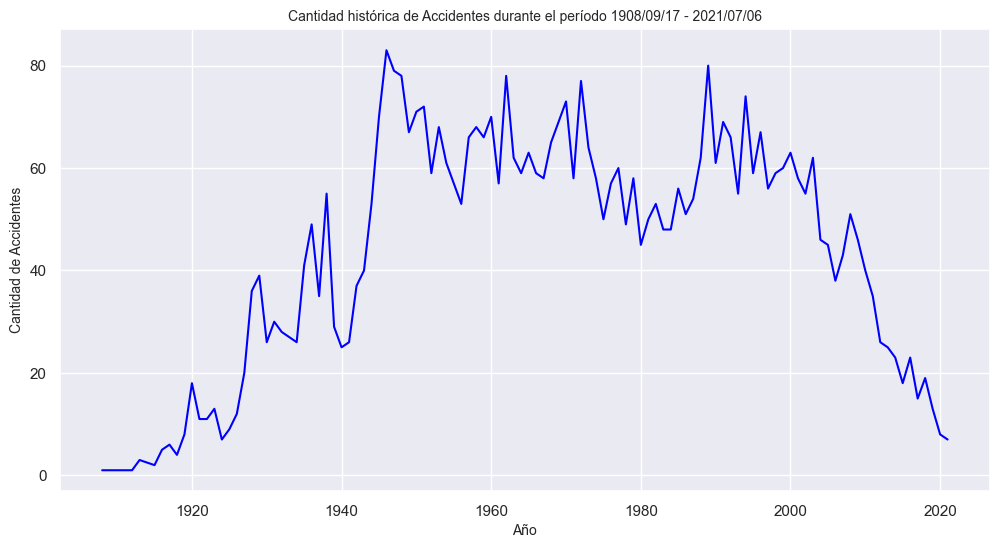

In [14]:
# Visualización de la cantidad de accidentes a lo largo de los años analizados

accidentes_por_anio = df.groupby(df['Fecha'].dt.year)['Fecha'].count().reset_index(name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=accidentes_por_anio, x='Fecha', y='Cantidad', color= 'blue')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de Accidentes', fontsize=10)
plt.title('Cantidad histórica de Accidentes durante el período 1908/09/17 - 2021/07/06', fontsize= 10)
plt.show()


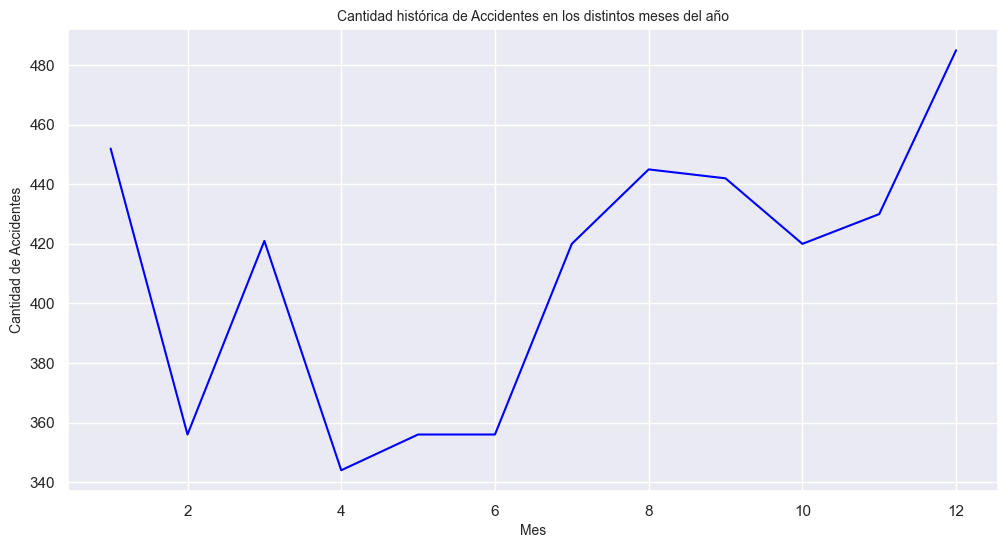

In [15]:
# Visualización de la cantidad de accidentes en los distintos meses del año

accidentes_por_mes = df.groupby(df['Fecha'].dt.month)['Fecha'].count().reset_index(name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=accidentes_por_mes, x='Fecha', y='Cantidad', color= 'blue')
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Cantidad de Accidentes', fontsize=10)
plt.title('Cantidad histórica de Accidentes en los distintos meses del año', fontsize=10)
plt.show()

# Se observa un incremento histórico del número de accidentes en el mes de diciembre.

C:\Users\s7\AppData\Local\Temp\ipykernel_888\2151752832.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax1)
C:\Users\s7\AppData\Local\Temp\ipykernel_888\2151752832.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P

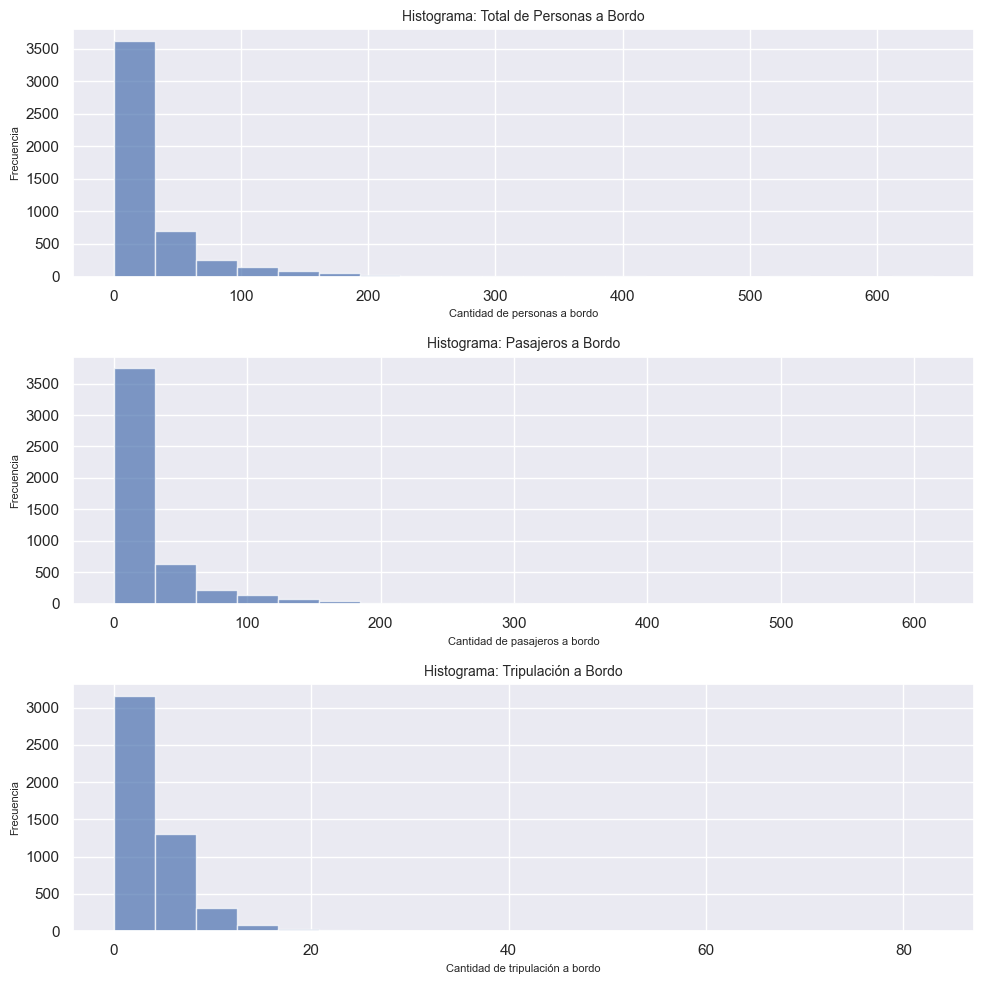

In [59]:
# Visualizaciones de distribucion de frecuencias 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))


sns.distplot(df['Total_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax1)
ax1.set_title('Histograma: Total de Personas a Bordo', fontsize=10)
ax1.set_xlabel('Cantidad de personas a bordo', fontsize=8)
ax1.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Pasajeros_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax2)
ax2.set_title('Histograma: Pasajeros a Bordo', fontsize=10)
ax2.set_xlabel('Cantidad de pasajeros a bordo', fontsize=8)
ax2.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Tripulacion_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax3)
ax3.set_title('Histograma: Tripulación a Bordo', fontsize=10)
ax3.set_xlabel('Cantidad de tripulación a bordo', fontsize=8)
ax3.set_ylabel('Frecuencia', fontsize=8)


plt.tight_layout()

plt.show()


C:\Users\s7\AppData\Local\Temp\ipykernel_888\4157304348.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fallecidos_Totales'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax1)
C:\Users\s7\AppData\Local\Temp\ipykernel_888\4157304348.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

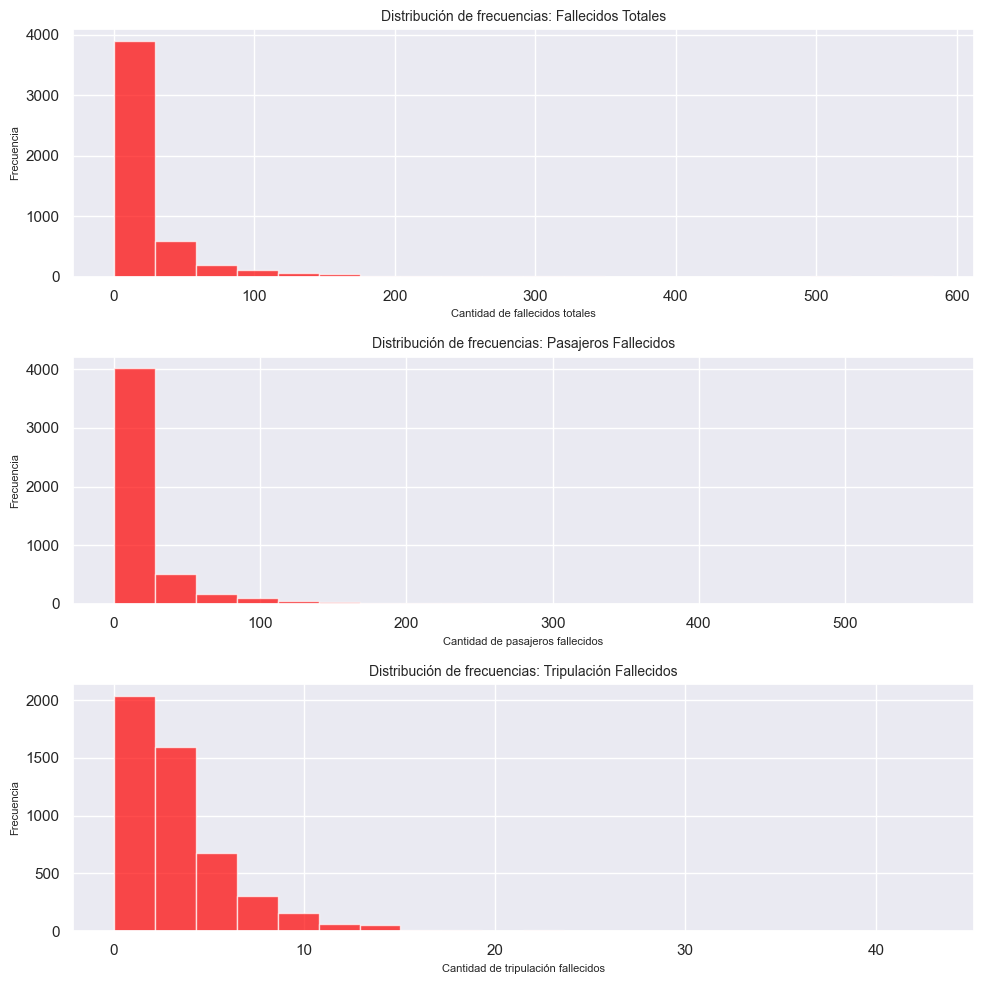

In [60]:
# Graficas de distribucion de frecuencias - Analisis univariado

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))


sns.distplot(df['Fallecidos_Totales'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax1)
ax1.set_title('Distribución de frecuencias: Fallecidos Totales', fontsize=10)
ax1.set_xlabel('Cantidad de fallecidos totales', fontsize=8)
ax1.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Fallecidos_Pasajeros'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax2)
ax2.set_title('Distribución de frecuencias: Pasajeros Fallecidos', fontsize=10)
ax2.set_xlabel('Cantidad de pasajeros fallecidos', fontsize=8)
ax2.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Fallecidos_Tripulacion'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax3)
ax3.set_title('Distribución de frecuencias: Tripulación Fallecidos', fontsize=10)
ax3.set_xlabel('Cantidad de tripulación fallecidos', fontsize=8)
ax3.set_ylabel('Frecuencia', fontsize=8)


plt.tight_layout()

plt.show()


C:\Users\s7\AppData\Local\Temp\ipykernel_11436\2363366105.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Victimas_Tierra'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red')


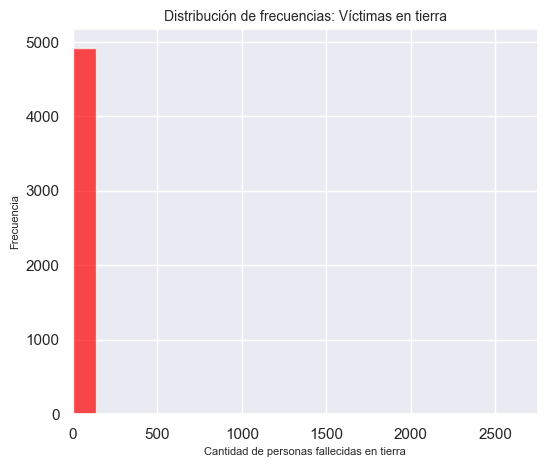

In [38]:
plt.figure(figsize=(6,5))
ax = sns.distplot(df['Victimas_Tierra'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red')
plt.title('Distribución de frecuencias: Víctimas en tierra', fontsize=10)
plt.xlabel('Cantidad de personas fallecidas en tierra', fontsize=8)
plt.ylabel('Frecuencia', fontsize=8)
plt.xlim(0,2750)
plt.show()

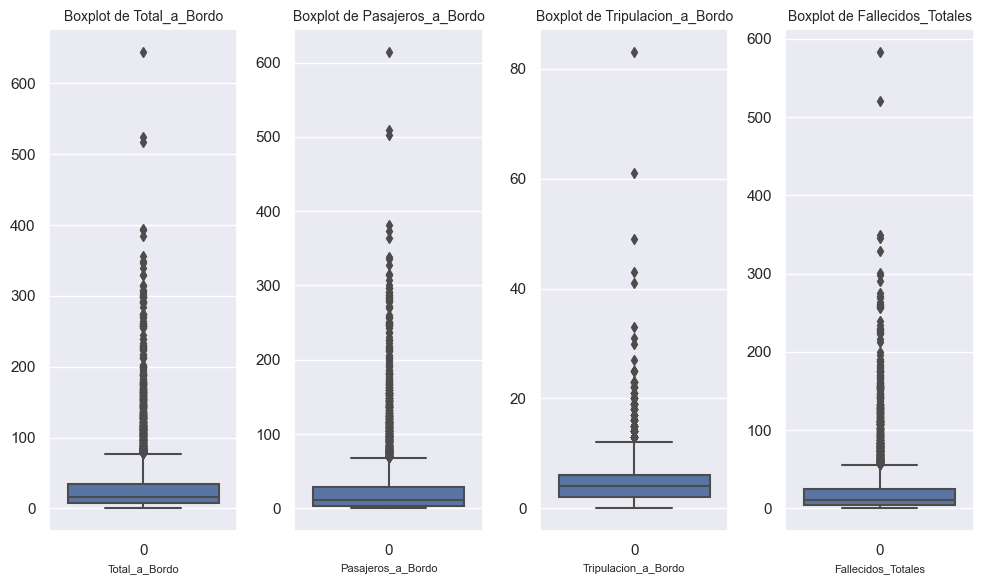

In [16]:
# Visualización de gráficas boxplot para una mejor comprensión de los puntos atípicos

numeric_columns = ['Total_a_Bordo', 'Pasajeros_a_Bordo', 'Tripulacion_a_Bordo', 'Fallecidos_Totales']

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

plt.tight_layout()
plt.show()


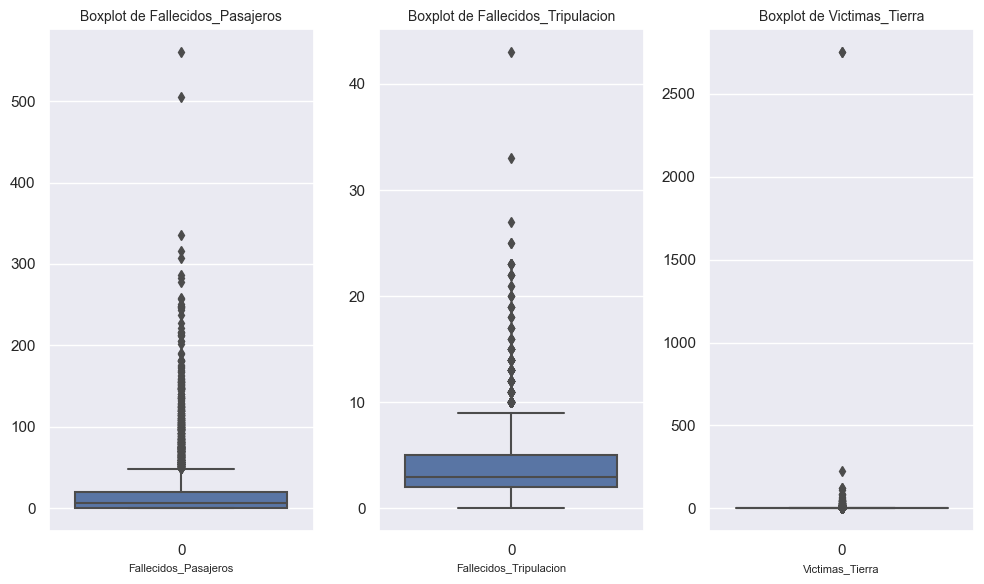

In [17]:
numeric_columns = ['Fallecidos_Pasajeros', 'Fallecidos_Tripulacion', 'Victimas_Tierra']

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

plt.tight_layout()
plt.show()


In [18]:
# Corrijo error de interpretación del módulo object por numpy
np.object = object

In [32]:
# Importo la librería wordcloud para realizar una visualización general de la columna resumen y advertir las palábras con mayor frecuencia en la misma
from wordcloud import WordCloud, STOPWORDS

In [33]:
text = str(df.Resumen.tolist())

In [34]:
stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

In [35]:
wc = WordCloud(background_color="white", max_words=5000,
               stopwords=stopwords)
wc.generate(text)

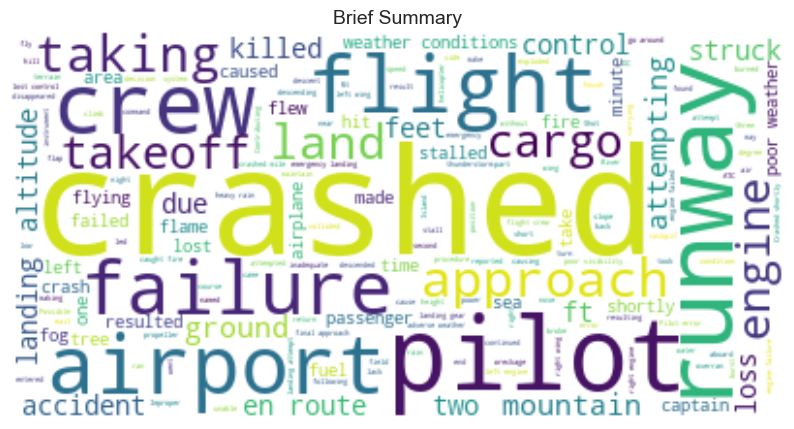

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)

plt.show()

Análisis bivariado de las variables en estudio

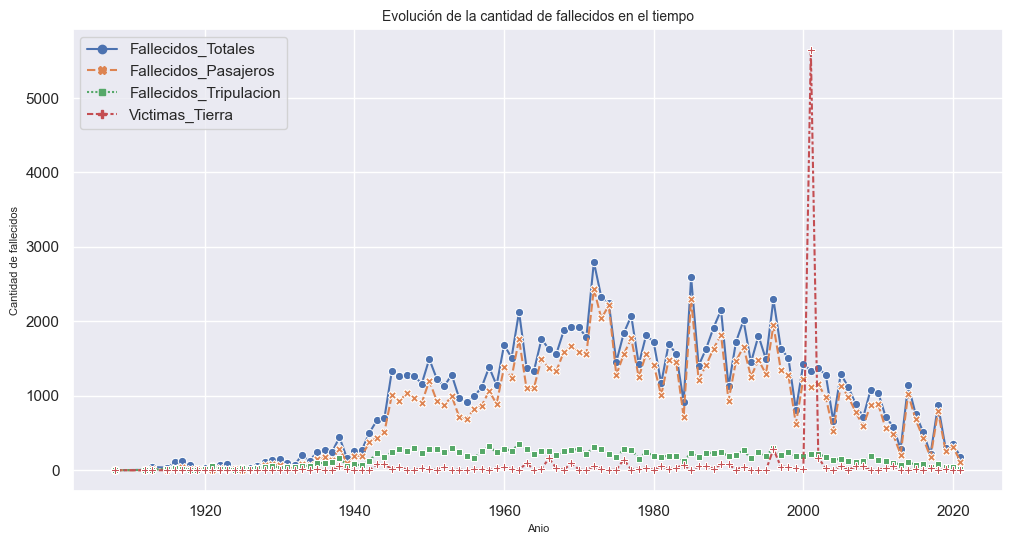

In [19]:
# Visualización de la cantidad de fallecidos totales a lo largo de los años teniendo en cuenta a qué grupo pertenecen. 
df_fallecidos = df.groupby(df['Fecha'].dt.year)[['Fallecidos_Totales', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulacion', 'Victimas_Tierra']].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fallecidos, markers=True)

plt.title('Evolución de la cantidad de fallecidos en el tiempo', fontsize=10)
plt.xlabel('Anio', fontsize=8)
plt.ylabel('Cantidad de fallecidos', fontsize=8)

plt.show()


In [20]:
# Corrobo el valor máximo observado, ya que no coincide con el valor máximo de la dscripción descriptiva general del dataframe,
# y tampoco coincide con el reporte  oficial de dicho suceso. 
total_victimas_2001 = df[df['Fecha'].dt.year == 2001]['Victimas_Tierra'].sum()
print("Total de víctimas en tierra en 2001:", total_victimas_2001)


Total de víctimas en tierra en 2001: 5641


In [21]:
# corroboro que el registro de víctimas en tierra aparece por duplicado, ya que el suceso hace referencia a dos accidentes que tuvieron impacto en el mismo lugar geografico.
# el total de 2750 víctimas en tierra es la sumatoria de las víctimas en tierra debidas a los dos accidentes. También lo corroboré con el reporte ofical de dichos sucesos
fila = df.loc[df['Fecha'] == '2001-09-11']
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
4265,2001-09-11,"Arlington, Virginia.",American Airlines,Boeing B-757-223,64,58,6,64,58,6,125,The aircraft was hijacked after taking off fro...
4266,2001-09-11,"New York City, New York",American Airlines,Boeing 767-223ER,92,81,11,92,81,11,2750,The aircraft was hijacked shortly after it lef...
4267,2001-09-11,"New York City, New York",United Air Lines,Boeing B-767-222,65,56,9,65,56,9,2750,The aircraft was hijacked shortly after it lef...
4268,2001-09-11,"Shanksville, Pennsylvania",United Air Lines,Boeing B-757-222,44,37,7,44,37,7,0,The aircraft was hijacked after taking off fro...


In [22]:
# Reemplazo uno de los valores por un nulo, ya que me está arrojando un dato erróneo el estar duplicado este valor. 
fila_especifica = 4266  
columna_especifica = df.columns.get_loc('Victimas_Tierra')
df.iloc[fila_especifica, columna_especifica] = np.nan

In [23]:
total_victimas_2001 = df[df['Fecha'].dt.year == 2001]['Victimas_Tierra'].sum()
print("Total de víctimas en tierra en 2001:", total_victimas_2001)


Total de víctimas en tierra en 2001: 2891.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   4927 non-null   datetime64[ns]
 1   Aeropuerto_Salida       4927 non-null   object        
 2   Operador                4927 non-null   object        
 3   Tipo_Aeronave           4927 non-null   object        
 4   Total_a_Bordo           4927 non-null   int64         
 5   Pasajeros_a_Bordo       4927 non-null   int64         
 6   Tripulacion_a_Bordo     4927 non-null   int64         
 7   Fallecidos_Totales      4927 non-null   int64         
 8   Fallecidos_Pasajeros    4927 non-null   int64         
 9   Fallecidos_Tripulacion  4927 non-null   int64         
 10  Victimas_Tierra         4926 non-null   float64       
 11  Resumen                 4927 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(6), obje

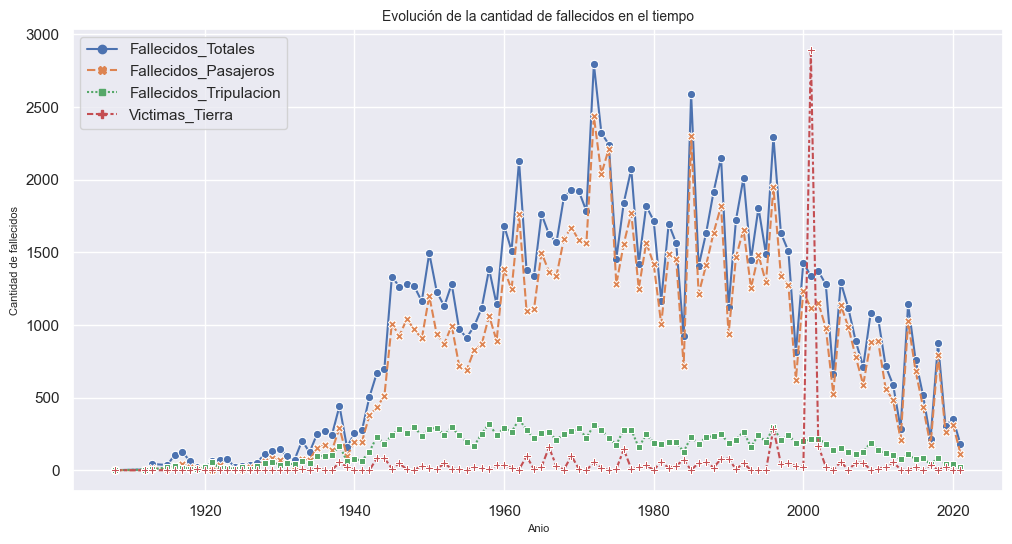

In [25]:
# Vizualizo nuevamente la gráfica anterior con la modificaión explicada anteriormente
df_fallecidos = df.groupby(df['Fecha'].dt.year)[['Fallecidos_Totales', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulacion', 'Victimas_Tierra']].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fallecidos, markers=True)

plt.title('Evolución de la cantidad de fallecidos en el tiempo', fontsize=10)
plt.xlabel('Anio', fontsize=8)
plt.ylabel('Cantidad de fallecidos', fontsize=8)

plt.show()


In [26]:
# Corroboro el cambio en los registros del dataframe
fila = df.loc[df['Fecha'] == '2001-09-11']
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
4265,2001-09-11,"Arlington, Virginia.",American Airlines,Boeing B-757-223,64,58,6,64,58,6,125.0,The aircraft was hijacked after taking off fro...
4266,2001-09-11,"New York City, New York",American Airlines,Boeing 767-223ER,92,81,11,92,81,11,NaN,The aircraft was hijacked shortly after it lef...
4267,2001-09-11,"New York City, New York",United Air Lines,Boeing B-767-222,65,56,9,65,56,9,2750.0,The aircraft was hijacked shortly after it lef...
4268,2001-09-11,"Shanksville, Pennsylvania",United Air Lines,Boeing B-757-222,44,37,7,44,37,7,0.0,The aircraft was hijacked after taking off fro...


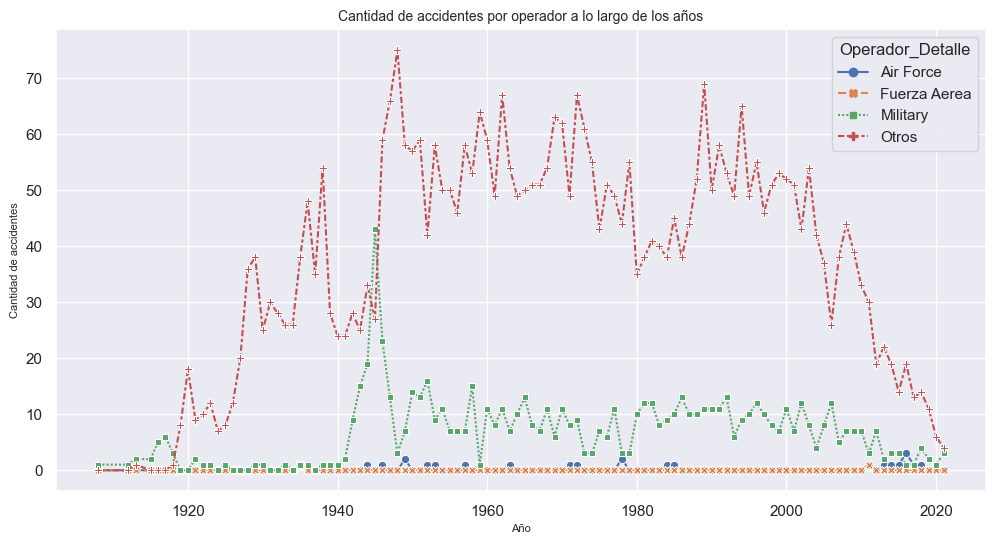

In [27]:
# Visualización de la evolución de la cantidad de accidentes e lo largo del período estudiado, teniendo en cuento cuatro grandes grupos de
# operadores "Miliatar, Fuerza Aerea, Air Force, Otros = Civil más adelante" 
df['Operador'] = df['Operador'].astype(str)

df['Operador_Categoria'] = df['Operador'].apply(lambda x: 'Military' if 'military' in x.lower() else
                                                  ('Fuerza Aerea' if 'fuerza aerea' in x.lower() else
                                                   ('Air Force' if 'air force' in x.lower() else 'Otros')))


df.loc[df['Operador_Categoria'].isin(['Military', 'Fuerza Aerea', 'Air Force']), 'Operador_Categoria'] = 'Otros'


df['Operador_Detalle'] = df['Operador'].apply(lambda x: 'Military' if 'military' in x.lower() else
                                              'Fuerza Aerea' if 'fuerza aerea' in x.lower() else
                                              'Air Force' if 'air force' in x.lower() else 'Otros')

df_agrupado = df.groupby([df['Fecha'].dt.year, 'Operador_Detalle']).size().unstack().fillna(0)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agrupado, markers=True)


plt.title('Cantidad de accidentes por operador a lo largo de los años', fontsize=10)
plt.xlabel('Año', fontsize=8)
plt.ylabel('Cantidad de accidentes', fontsize=8)


plt.show()


In [28]:
# Creo una nueva columna en mi dataframe que contenga las cuatro grandes clasificaciones 
df['Operador_Categoria'] = df['Operador'].apply(lambda x: 'Military' if 'military' in x.lower() else
                                                  ('Fuerza Aerea' if 'fuerza aerea' in x.lower() else
                                                   ('Air Force' if 'air force' in x.lower() else 'Civil')))

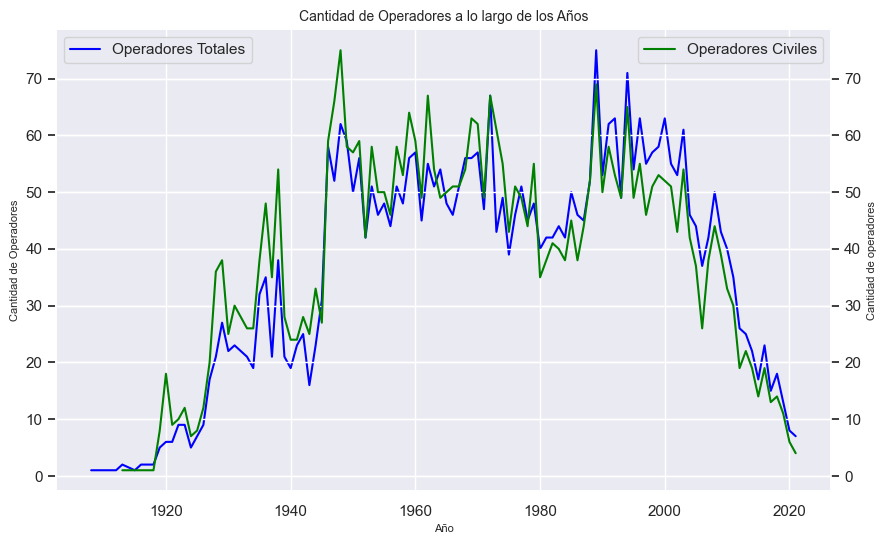

In [29]:
# Visualización de la evolución de la cantidad de operadores a lo largo de lo años, según dos grandes clasificaciones "Militar y Civil"async 

df['Año'] = df['Fecha'].dt.year
data1 = df.groupby('Año')['Operador'].nunique().reset_index()
sns.set(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=data1, x='Año', y='Operador', ax=ax1, label='Operadores Totales', color='blue')
ax1.set_title('Cantidad de Operadores a lo largo de los Años', fontsize=10)
ax1.set_xlabel('Año', fontsize=8)
ax1.set_ylabel('Cantidad de Operadores', fontsize=8)

df['Operador'] = df['Operador'].astype(str)
df['Operador_Categoria'] = df['Operador'].apply(lambda x: 'Military' if 'military' in x.lower() else
                                                ('Fuerza Aerea' if 'fuerza aerea' in x.lower() else
                                                 ('Air Force' if 'air force' in x.lower() else 'Otros')))
df['Operador_Detalle'] = df['Operador'].apply(lambda x: 'Fuerza Aerea' if 'fuerza aerea' in x.lower() else
                                              ('Air Force' if 'air force' in x.lower() else 'Otros'))
df_agrupado = df[df['Operador_Categoria'] == 'Otros'].groupby(df['Fecha'].dt.year).size()
ax2 = ax1.twinx()
sns.lineplot(data=df_agrupado, markers=True, ax=ax2, label='Operadores Civiles', color='green')
ax2.set_ylabel('Cantidad de operadores', fontsize=8)


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()


Análisis Multivariado 

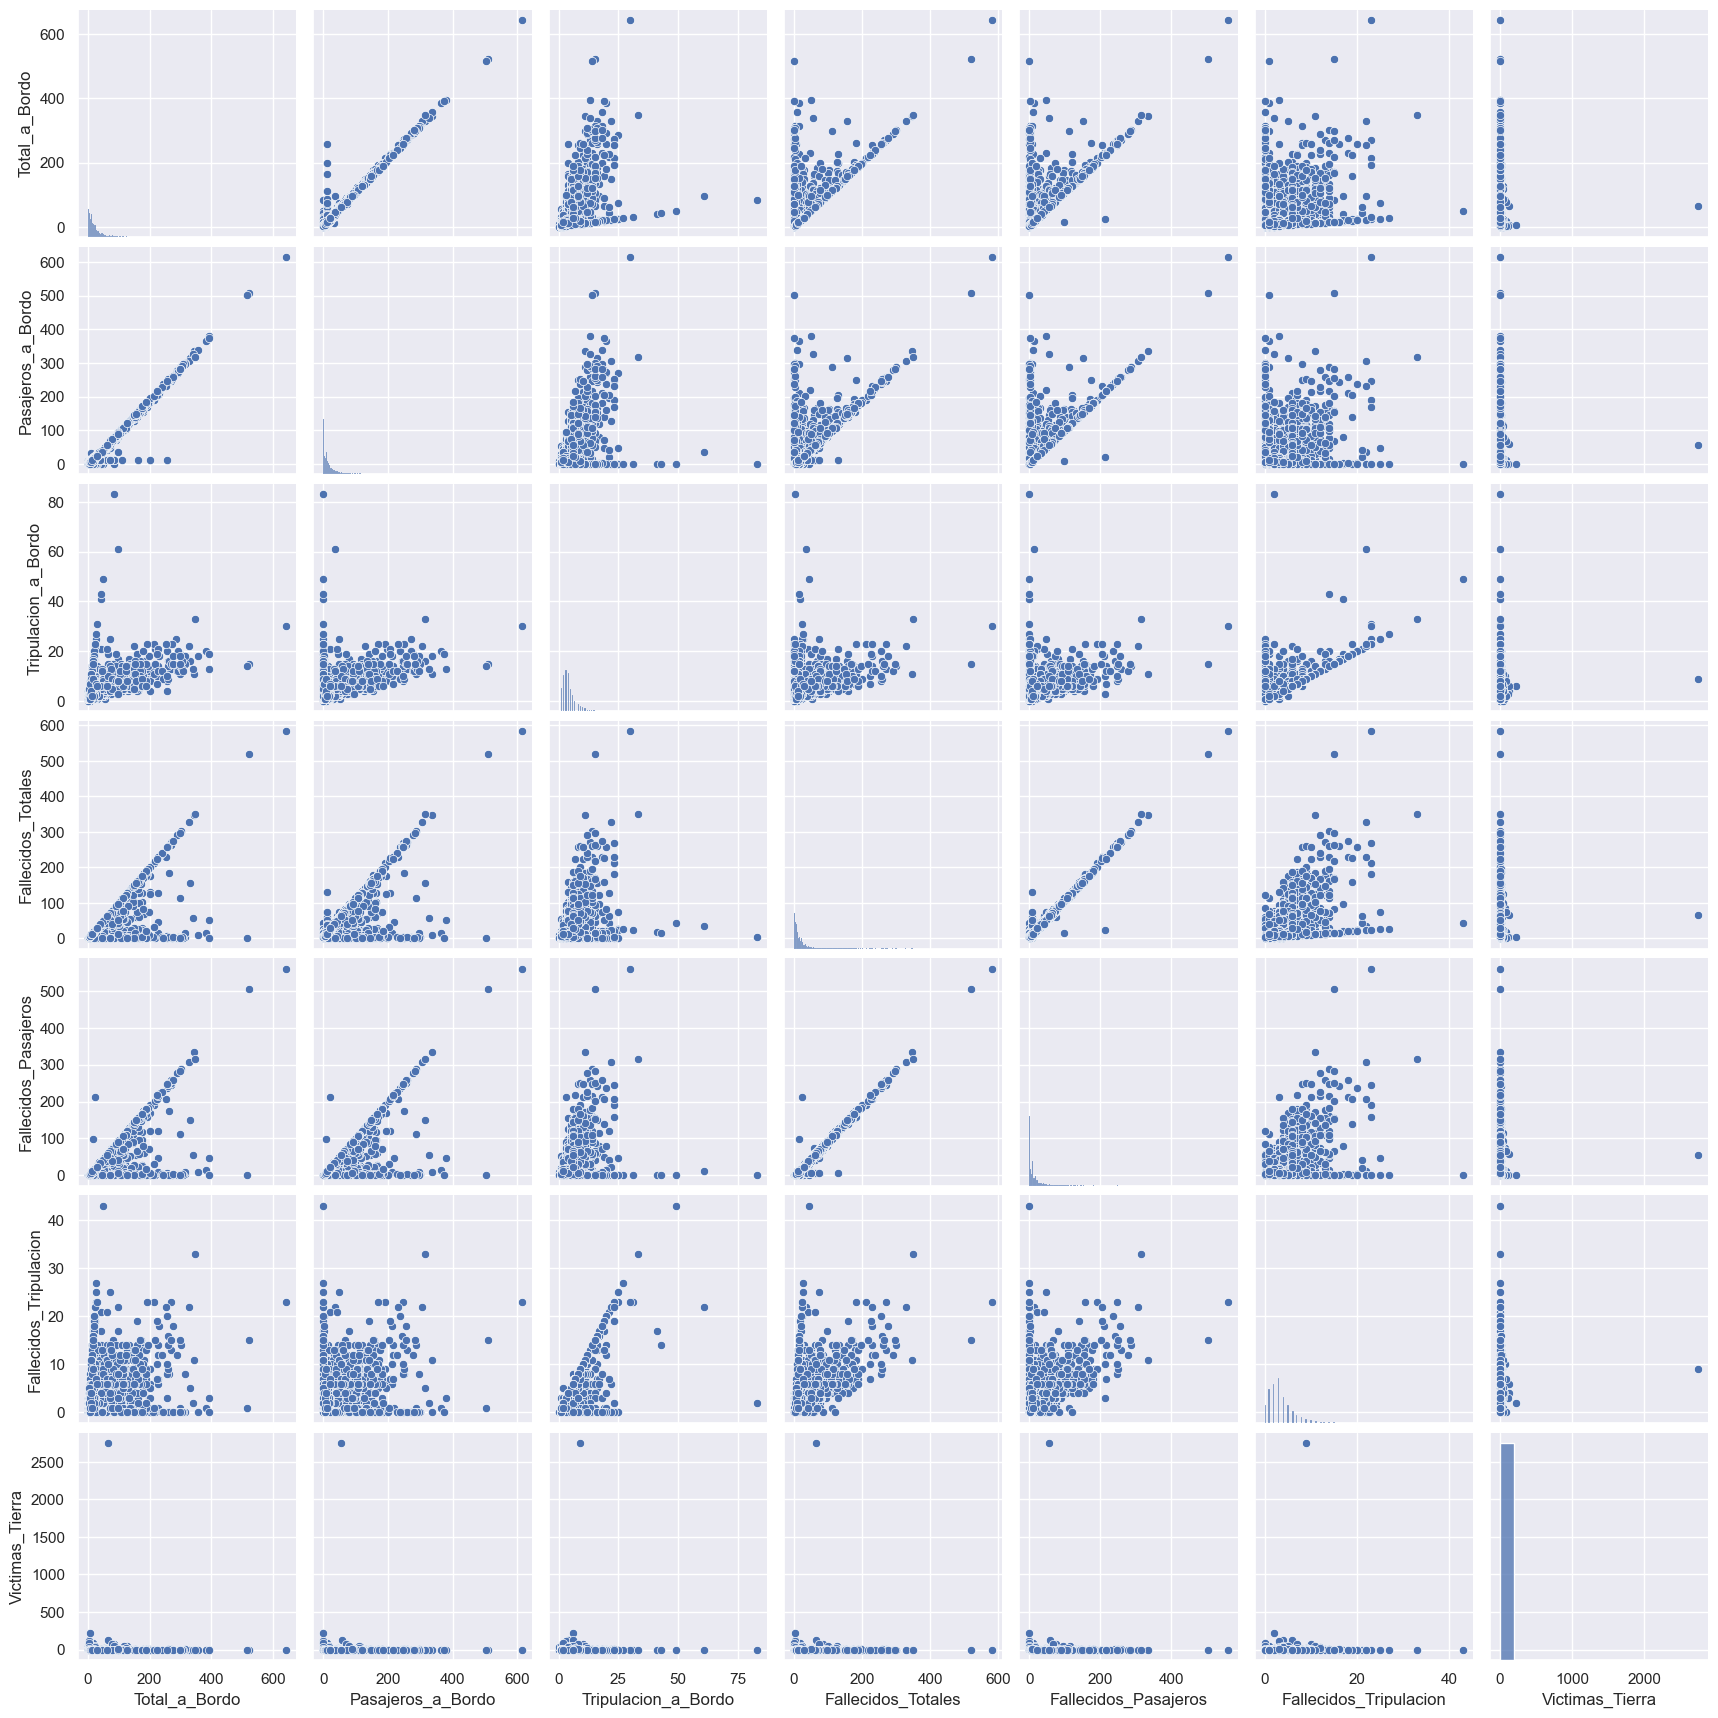

In [30]:
columnas_num = ['Total_a_Bordo', 'Pasajeros_a_Bordo', 'Tripulacion_a_Bordo', 'Fallecidos_Totales', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulacion', 'Victimas_Tierra']

sns.pairplot(data=df[columnas_num])
plt.show()

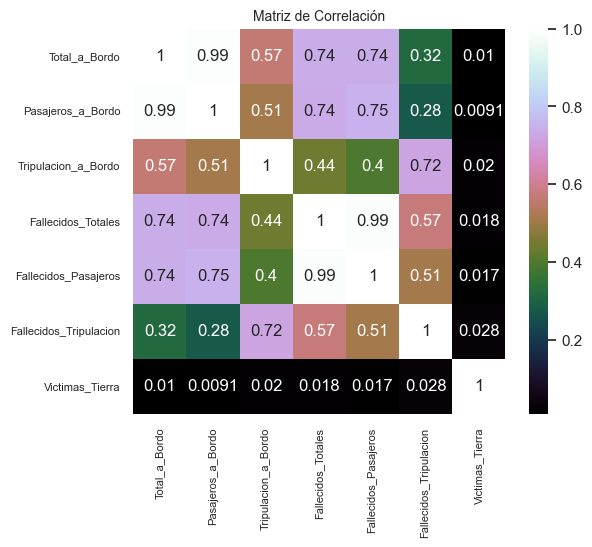

In [31]:
# Cálculo y vizualización de la matriz de correlación entre las variables numéricas de interés 
correlation_matrix = df[columnas_num].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix')

plt.title('Matriz de Correlación', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.show()


In [37]:
# Añado la columna de clasificación utilizando np.where() para poder hacer una distinción entre accidentes con víctimas fatales y no fatales 
# que será de utilidad en la definición de una posible KPI.
df['Clasificación'] = np.where(df['Fallecidos_Totales'] > 0, 'Fatal', 'No Fatal')

In [38]:
# Añado la columna de sobrevivientes que será de uitlidad para el cálculo de una posible KPI.
df['Sobrevivientes'] = df['Total_a_Bordo'] - df['Fallecidos_Totales']

In [39]:
# Añado la columna cantidad para poder contabilizar la cantidad de accidentes conh una función de agregfación en la herramienta visual donde 
# desarrollaré el dashboard
df['Cantidad'] = 1

In [40]:
df.head(3)

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen,Operador_Categoria,Operador_Detalle,Año,Clasificación,Sobrevivientes,Cantidad
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,1,1,1,0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,Otros,1908,Fatal,1,1
1,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0,5,5,0,5,0.0,First U.S. dirigible Akron exploded just offsh...,Military,Otros,1912,Fatal,0,1
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,0,1,1,0,1,0.0,The first fatal airplane accident in Canada oc...,Otros,Otros,1913,Fatal,0,1


In [41]:
df.to_csv('Data.csv', index=False)